In [1]:
import nltk 
from nltk.corpus import stopwords as stp
import re

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import datetime as dfg

In [3]:
def sc(a,b):
    c=a/b
    #print('c',c)
    q=c/10
    #print('q',q)
    w=c/q
    #print('w',w)
    if a<b:
        a=a*w*q
    else:
        b=b*w*q
    return a%b
    

In [4]:
def sc(a,b):
    q=a/b
    #print(q)
    if (round(q,4)-int(q))==0:
        return 0
    return 1

In [5]:
print(sc(0.14,0.02))

0


In [17]:
inp1=['what is the time',
    'tell the time',
      'can you please tell me the time',
    'what is on clock',
      'can you read the clock for me',
      'what\'s the time now',
    'please tell me the time',
    'what time is it',
    'Excuse me could please tell what time is it',
    'what is today temperature',
    'how hot is it outside',
    'how cool is it outside',
    'what is the temperature',
      'please tell me today\'s temperature',
      'please tell me how hot is it today',
     'how hot is it',
     'how cool is it',
      'is it too cool outside',
      'what can be the temperature outside',
     'please tell me what is the temperature',
     'excuse me could you tell what is the temperature outside',
     'where am I now',
     'can you please tell me where am i now',
     'excuse me where am I now',
     'tell my location',
     'point my location',
     'locate me',
     'where am I',
     'what is my location']
y11=[.02,0.02*2,.02*4,0.02*6,.02*8,.02*10,.02*12,.02*14,0.02*16,.03,.03*2,.03*4,.03*6,.03*8,.03*10,0.03*12,0.03*14,0.03*16,0.03*18,0.03*20,0.03*22
    ,0.07,0.07*2,0.07*4,0.07*6,0.07*8,0.07*10,0.07*12,0.07*14]
y=[.02,0.02,.02,0.02,.02,.02,.02,.02,0.02,.03,.03,.03,.03,.03,.03,0.03,0.03,0.03,0.03,0.03,0.03,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07]
y1=[1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2]

In [18]:
inp=[]
for i in inp1:
    i=i.lower()
    temp=i.split()
    for j in stp.words('english'):
        if j in temp:
            temp.remove(j)
    ts=''
    for k in temp:
        ts=ts+k+' '
    inp.append(ts)
    print(ts)

time 
tell time 
please tell time 
clock 
read clock 
what's time 
please tell time 
time 
excuse could please tell time 
today temperature 
hot outside 
cool outside 
temperature 
please tell today's temperature 
please tell hot today 
hot 
cool 
cool outside 
temperature outside 
please tell temperature 
excuse could tell temperature outside 

please tell 
excuse 
tell location 
point location 
locate 

location 


In [9]:
freq={}
kj=0
for i in inp:
    for j in i.split():
        if j in freq:
            a=round(y11[kj],4)
            freq[j]+=a
        else:
            a=round(y[kj],4)
            freq[j]=a
        if j=='cool':
            print(a)
        
    kj+=1

In [9]:
freq

{'time': 1.1800000000000002,
 'tell': 3.02,
 'please': 1.8600000000000003,
 'clock': 0.18,
 'read': 0.02,
 "what's": 0.02,
 'excuse': 0.9600000000000001,
 'could': 0.68,
 'today': 0.32999999999999996,
 'temperature': 2.25,
 'hot': 0.69,
 'outside': 1.83,
 'cool': 0.9299999999999999,
 "today's": 0.03,
 'location': 1.61,
 'point': 0.07,
 'locate': 0.07}

In [10]:
fr={}
k=0
for i,j in zip(freq.values(),freq.keys()):
    if sc(i,0.02)==0:
        #print(j+': task is to find time')
        fr[j]=i
        if (sc(i,0.03)==0)or(sc(i,0.07)==0):
            z=fr.pop(j)
            if j=='cool':
                print('cool',i)
            #print(str(j)+' '+str(z)+' poped 1')
    if sc(i,0.03)==0:
        #print(j+': task is to find temperature')
        fr[j]=i
        if (sc(i,0.02)==0) or(sc(i,0.07)==0):
            z=fr.pop(j)
            #print(str(j)+' '+str(z)+' poped 2')
    if sc(i,0.07)==0:
        fr[j]=i
        if ((sc(i,0.02)==0)or(sc(i,0.03)==0)):
            fr.pop(j)
    else:
        k+=1
    k+=1

In [11]:
sc(0.09,0.02)

1

In [12]:
fr

{'time': 1.1800000000000002,
 'tell': 3.02,
 'read': 0.02,
 "what's": 0.02,
 'could': 0.68,
 'temperature': 2.25,
 'hot': 0.69,
 'outside': 1.83,
 'cool': 0.9299999999999999,
 "today's": 0.03,
 'location': 1.61,
 'point': 0.07,
 'locate': 0.07}

In [13]:
qw=[]
l=0
for i in fr.values():
    l=l+1
    qw.append(i)
qwe=[1,2,2,2,2,2]

In [14]:
len(qw)

13

In [15]:
qw

[1.1800000000000002,
 3.02,
 0.02,
 0.02,
 0.68,
 2.25,
 0.69,
 1.83,
 0.9299999999999999,
 0.03,
 1.61,
 0.07,
 0.07]

In [16]:
xc=[2,2,2,2,2,3,3,3,3,3,7,7,7]
len(xc)

13

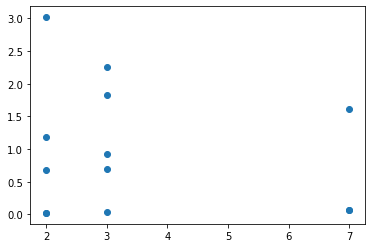

In [17]:
plt.scatter(xc,qw)

In [19]:
def out():
    z=0
    q=input('enter task: ').lower()
    for i in q.split():
        if i in fr:
            if sc(fr[i],0.02)==0:
                z+=fr.get(i,0)
                #print(dfg.datetime.today().isoformat())
                break
            elif sc(fr[i],0.03)==0:
                z+=round(fr.get(i,0),4)
                #print('39 degree C')
                break
            elif sc(fr[i],0.07)==0:
                z+=round(fr.get(i,0),4)
                #print('at your home')
    z1=sc(z,0.02)
    z2=sc(z,0.03)
    z3=sc(z,0.07)
    if (z1<z2) and (z1<z3):
        print(dfg.datetime.today().isoformat())
        #print(z1,z2,z3)
    elif (z2<z3)and (z2<z1):
        print('39 degree C')
    elif (z3<z2)and(z3<z1):
        print('at your home')
    else:
        print('try again')
        print(z,z1,z2,z3)

# TEST-CASE-1#

In [20]:
out()

enter task: can you please tell the time
2021-03-17T01:10:02.958114


# TEST-CASE-2#

In [21]:
out()

enter task: what is the temperature
39 degree C


# TEST-CASE-3

In [22]:
out()

enter task: what is my location
at your home
